# UniRef90 - UniProt mapping Dataset Analysis


In [19]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)
from ast import literal_eval


In [2]:
def column_stats(df, column_name):
    n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")

In [20]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

In [55]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_virushostdb_hosts_pruned_metadata_species.csv")

In [56]:
df = pd.read_csv(input_file_path)
# df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [57]:
print("df size = ", df.shape)
df.head()

df size =  (626319, 7)


,uniref90_id,tax_id,host_tax_ids,virus_name,virus_taxon_rank,virus_host_name,virus_host_taxon_rank
0,UniRef90_A0A023GZ41,12315,4081,Tomato aspermy virus,species,Solanum lycopersicum,species
1,UniRef90_A0A023GZ41,12315,41568,Tomato aspermy virus,species,Chrysanthemum x morifolium,species
2,UniRef90_A0A023H4L7,12321,3827,Alfalfa mosaic virus,species,Cicer arietinum,species
3,UniRef90_A0A023H4L7,12321,3847,Alfalfa mosaic virus,species,Glycine max,species
4,UniRef90_A0A023H4L7,12321,3864,Alfalfa mosaic virus,species,Lens culinaris,species


In [58]:
column_stats(df, "virus_name")

Number of unique values = 7220
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            319333           50.985680
1                                     Hepatitis B virus             27870            4.449809
2                                   Hepacivirus hominis             18589            2.967976
3                                      Microviridae sp.             14316            2.285736
4                               Paslahepevirus balayani              9196            1.468261
5                                          Cowpox virus              8294            1.324245
6                                     Lyssavirus rabies              5388            0.860264
7                                           Rotavirus A              5276            0.842382
8                                     Bacteriophage sp.              4685            0.748021
9                         Sim

In [59]:
column_stats(df, "virus_host_name")

Number of unique values = 2121
                                virus_host_name  virus_host_name_count  virus_host_name_percent
0                                  Homo sapiens                 376246                60.072583
1                               Pan troglodytes                  17892                 2.856691
2                                    Bos taurus                   8259                 1.318657
3                          Chlorocebus aethiops                   8111                 1.295027
4                      Acanthamoeba castellanii                   5028                 0.802786
5                                 Ciona robusta                   4772                 0.761912
6                              Acanthamoeba sp.                   4721                 0.753769
7                       Enterococcus gallinarum                   4685                 0.748021
8                                    Sus scrofa                   3833                 0.611988
9        

min seq len = 11
max seq len = 7217


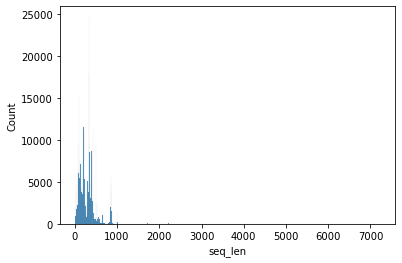

     start     end   count  percentage
0     11.0   611.5  343915   92.820302
1    611.5  1212.0   25516    6.886594
2   1212.0  1812.5     608    0.164095
3   1812.5  2413.0     335    0.090414
4   2413.0  3013.5      97    0.026180
5   3013.5  3614.0      14    0.003779
6   3614.0  4214.5      16    0.004318
7   4214.5  4815.0      10    0.002699
8   4815.0  5415.5       0    0.000000
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5       0    0.000000
11  6616.5  7217.0       6    0.001619


In [27]:
print_seq_len_histogram(df, n_bins=12)